In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('loan.csv',low_memory=False)
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print(data.isnull().sum()) #shows total null values in each column'

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

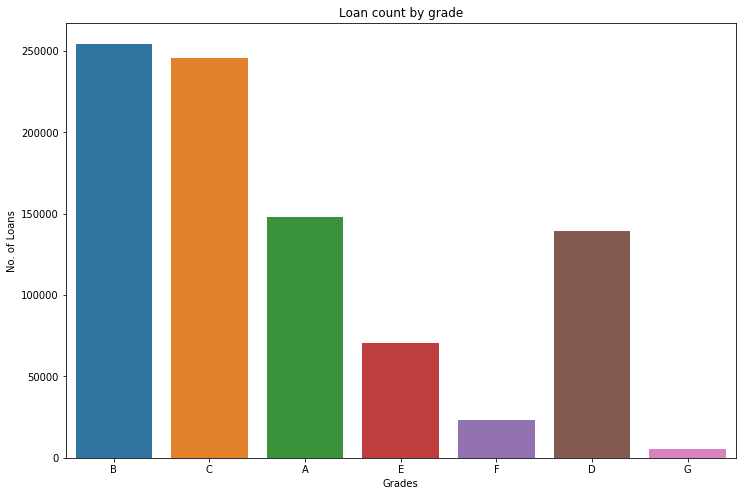

In [51]:
#Lets visualize the data 

#How many loans by what grade? 
plt.figure(figsize=(12,8));
sns.countplot(data.grade);
plt.title('Loan count by grade');
plt.xlabel("Grades");
plt.ylabel("No. of Loans");


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


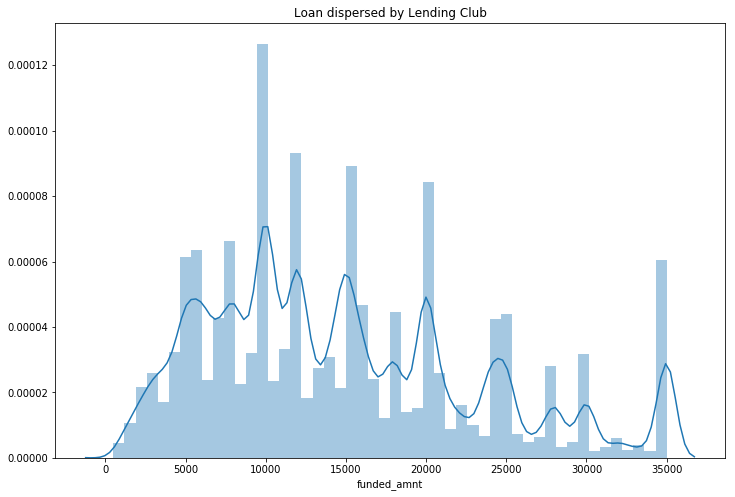

In [50]:
#How is the loan amount distributed? 
plt.figure(figsize=(12,8));
sns.distplot(data.funded_amnt);
plt.title("Loan dispersed by Lending Club");

In [48]:
#covernt datatype into year
dt_series = pd.to_datetime(data['issue_d'])
print(dt_series.head(5))
data['year'] = dt_series.dt.year

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]


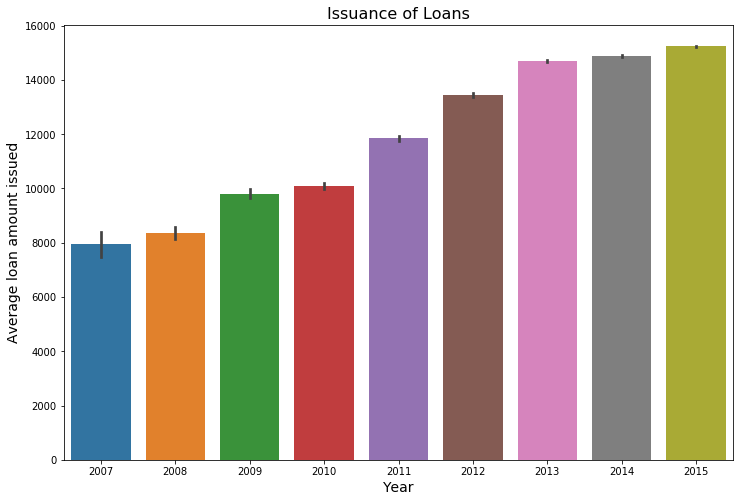

In [49]:
#by time, loan status, growth, issue etc

#data['issue_d'].head()
#dt_series = pd.to_datetime(data['issue_d'])
#data['year'] = dt_series.dt.year

plt.figure(figsize=(12,8))
sns.barplot('year', 'funded_amnt', data=data, palette='tab10');
plt.title('Issuance of Loans', fontsize=16);
plt.xlabel('Year', fontsize=14);
plt.ylabel('Average loan amount issued', fontsize=14);

In [38]:
#What is the outstanding loan status

data["loan_status"].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [36]:
#data = loaded_data.drop(columns=['id', 'member_id', 'title','desc','total_cu_tl','inq_last_12m','inq_fi','verification_status_joint','dti_joint','annual_inc_joint','open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi','total_cu_tl','inq_last_12m','mths_since_last_record','mths_since_last_major_derog',
                                'mths_since_last_delinq','next_pymnt_d'])
# dropping title because what it is for does not matter much
#print(data.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     51462
emp_length                    44825
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                  

In [37]:
data['annual_inc'][data['annual_inc'].isnull()] = 0 #setting annual income to 0 whereever null values to mitigate risk of debt/income becoming skewed. 
data['emp_title'][data['emp_title'].isnull()] = "no title"
data['emp_length'][data['emp_length'].isnull()] = 0
data['revol_util'][data['revol_util'].isnull()] = data['revol_util'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anac

In [43]:
data.shape #finally in usable format. 

(799510, 49)

In [44]:
#visualizing data from here on 

import matplotlib.pyplot as plt 